<font color="orange" size="5"><b> Recherche textuelle : algorithme de Boyer Moore - Horspool (partie 3)</b></font>

# 3.1 Deux idées

Les performances de la recherche naïve laissant à désirer, de nombreux informaticiens ont proposé des solutions pour améliorer la recherche. Un des algorithmes les plus connus est **l’algorithme de Knuth, Morris, Pratt**, mais il ne
figure pas au programme. Un autre algorithme, très efficace, est [**l’algorithme de Boyer et Moore**](https://www.canal-u.tv/video/inria/3_6_l_algorithme_de_boyer_moore.24590), qui a été inventé en 1977.

**Boyer et Moore** travaillaient alors à l’université d’Austin au Texas en tant qu’informaticiens. Boyer qui était aussi un mathématicien est maintenant à la retraite.
**Nigel Horspool**  est né en Grande-Bretagne mais citoyen canadien. Il est professeur émérite d’informatique de l’université de Victoria, retraité depuis 2016. Il a conçu une **variante simplifiée de l'algorithme de Boyer-Moore**, s'appuyant sur deux idées : 

- **La première idée** consiste à comparer le motif avec la portion du texte qui apparaît dans la fenêtre <font color='blue' size='3'>**de droite à gauche**</font>, et non pas de gauche à droite. 

Ainsi, on fait décroître $j$ à partir de $p − 1$ jusqu’à trouver que le caractère qui lui fait face dans le texte, c’est-à-dire
$x = \text{texte}[i + j]$, est différent du caractère $y = \text{motif}[j]$ du motif.

- **La deuxième idée** consiste à opérer sur la fenêtre <font color = 'blue' size='3'>**un décalage qui varie</font>** en fonction de la paire de caractères qui ont révélé la non-correspondance, c’est-à-dire en fonction de $(x; y)$. Pour cela, <font color = 'blue' size='3'>**on effectue un pré-traitement du motif.</font>**



## 3.2. Calcul du décalage quand x n'apparaît pas dans le motif

Quand x n'apparaît pas du tout dans le motif : on déplace la fenêtre <font color = 'blue' size='3'>**pour qu'elle soit juste à droite du couple (x,y) qui a provoqué l'échec**</font>. 

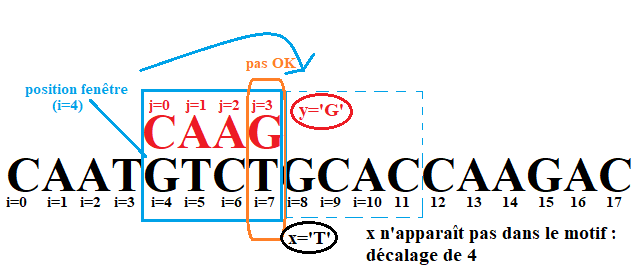![img fenetre](http://www.nsi.saintdominique-pau.fr/Tale/BoyerMoore/img_BM5.png)

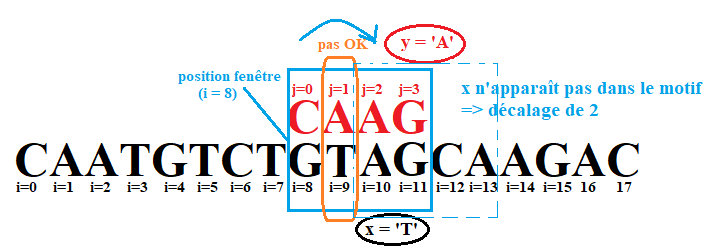



**<font color='blue' size='3'> Le décalage dans ce cas pour un échec en position $j$ du motif est donc de $d= j+1$</font>**

## 3.3. Calcul du décalage quand x apparaît ailleurs dans le motif

Dans le cas où x apparaît dans le motif, on déplace la fenêtre <font color = 'blue' size='3'>**pour que x apparaisse juste au-dessus de la lettre du motif qui lui est égale**</font>.

Si x apparaît plusieurs fois dans le motif, alors on utilisera pour décaler <font color = 'blue' size='3'>**la position la plus à droite, qu'on note $r$.</font>**

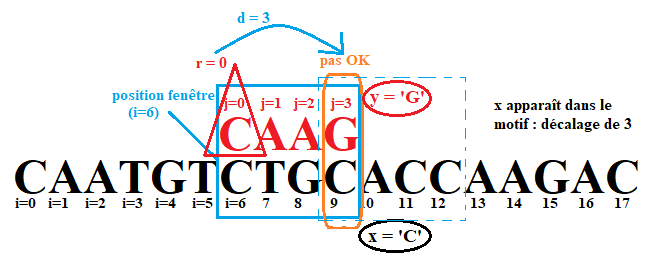

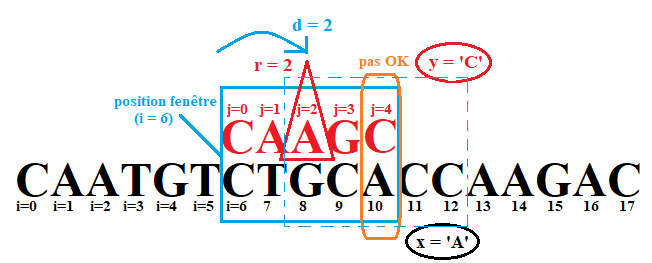






**<font color='blue' size='3'>On calcule alors $d=j-r$ : </font>**
 
 - **<font color='blue' size='3'>si $d > 0$, on décale de $d$</font>** 
 - **<font color='blue' size='3'>Sinon, on décale de 1 comme dans la méthode naïve.</font>** 

## 3.4. Programmation de la méthode de Horspool

### a) 💡 **Prétraitement du motif** : calcul de la position la plus à droite et stockage dans un dictionnaire

On va ici construire un dictionnaire <code>aDroite</code> dont :
- les **clés** sont les caractères (les lettres) du motif
- les **valeurs** sont la position la plus à droite du caractère dans la chaîne de caractère du motif.

Par exemple, pour le motif `maman` le prétraitement consistera à créer le dictionnaire suivant:  
`{'m': 2, 'a': 3, 'n': 4}`

**<font color='blue'>💻 A vous de jouer 1 :</font>**  
Ecrire la fonction <code>construitADroite(motif)</code> qui renvoie le dictionnaire ainsi construit pour le motif donné en paramètre.

In [1]:
# Votre code
def construitADroite(motif):
    """
    Précondition : motif est de type str
    Postcondition : la fonction renvoie un dictionnaire dont les clefs sont les caractères du motif
    et le valeurs sont leur position la plus à droite dans le motif.
    Par exemple construitADroite("maman")renvoie {'m': 2, 'a': 3, 'n': 4} 
    
    """
    aDroite = {}
    p = len(motif)
    for j in range(p):
        aDroite[motif[j]]=j
    return aDroite

Autre réponse possible : 

In [35]:
# Votre code
def construitADroite(motif):
    """
    Précondition : motif est de type str
    Postcondition : la fonction renvoie un dictionnaire dont les clefs sont les caractères du motif
    et le valeurs sont leur position la plus à droite dans le motif.
    Par exemple construitADroite("maman")renvoie {'m': 2, 'a': 3, 'n': 4} 
    
    """
    aDroite = {}
    j = 0
    for lettre in motif:
        aDroite[lettre]=j
        j = j+1
    return aDroite

In [36]:
assert construitADroite('maman') == {'m': 2, 'a': 3, 'n': 4}


In [37]:
construitADroite('jour')

### b) Ecriture de la nouvelle fonction <code>correspondance</code>

**<font color='blue'>💻 A vous de jouer 2  : </font>**  
Compléter le code de la fonction <code>correspondance(texte, motif, i, aDroite)</code>.  
Comme dans la partie 2, cette fonction renvoie, pour une fenêtre en position $i$, un couple formé :
- d'un booléen <code>ok</code> qui vaut True si on a trouvé une occurrence du motif, et False sinon
- d'un entier <code>decalage</code> qui est cette fois calculé selon la méthode de Horspool

In [27]:
# Votre code
def correspondance(texte, motif, i, aDroite):
    """"
    Préconditions : texte,et motif sont de type str. i est de type int (position de la fenêtre), 
    aDroite est de type dict (dictionnaire de prétraitement de motif).
    Postcondition : Cette fonction, pour une fenêtre en position i, renvoie un tuple.
    - Premier élément de tuple : True s'il y a correspondance, False sinon.
    - Deuxième élément du tuple : décalage à effectuer
    Par exemple :
    correspondance("Bonjour","jour", 1, {'j': 0, 'o': 1, 'r': 3, 'u': 2}) renvoie (False, 2)
    correspondance("Bonjour","jour", 3, {'j': 0, 'o': 1, 'r': 3, 'u': 2}) renvoie (True, 0)
    """
    n = len(texte)
    p = len(motif)
    for j in range(p-1, -1, -1): #on balaie cette fois la fenêtre de droite à gauche : de p-1 à 0 inclus en décroissant
        x = texte[i+j]
        if x != motif[j]:
            # on teste déjà si x est dans le motif c'est à dire si c'est une clé de aDroite
            # puis on calcule le décalage
            if x in aDroite.keys():
                r = aDroite[x] # position la plus à droite
                d = j - r # décalage si d >0
                if d < 0: # si d <0 décalage de 1
                    d = 1
            # si x n'est pas dans le motif : décalage maximal
            else:
                d = j + 1
            return (False, d)
    # si on est arrivé là, c'est qu'il y a eu correspondance parfaite : 
    # on a trouvé une occurrence. Décalage à 0
    return (True, 0)

assert correspondance("Bonjour","jour", 1, {'j': 0, 'o': 1, 'r': 3, 'u': 2}) == (False, 2)
assert correspondance("Bonjour","jour", 3, {'j': 0, 'o': 1, 'r': 3, 'u': 2}) == (True, 0)

In [28]:
texte = 'CAATGTCTGCACCAAGAC'
motif = 'CAAG'

aDroite = construitADroite(motif)
assert correspondance(texte, motif, 0, aDroite)==(False, 4)
assert correspondance(texte, motif, 3, aDroite)==(False, 3)
assert correspondance(texte, motif, 7, aDroite)==(False, 1)
assert correspondance(texte, motif, 12, aDroite)==(True, 0)

Vérifions le cas de la diapositive 3 du diaporama de wims :  
G se trouve à droite de C, on aurait d = 3 - 4 = -1.   
On décale donc de d = 1

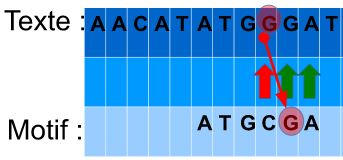

In [29]:
texte = "AACATATGGGAT"
motif = "ATGCGA"
aDroite = construitADroite(motif)
print(correspondance(texte, motif, 5, aDroite))

(False, 1)


### c) Ecriture de la fonction de recherche finale

Maintenant qu'on a la fonction <code>correspondance</code>, on peut passer à l'écriture de la fonction de recherche finale.

Cette fonction <code>recherche(texte, motif)</code> :
- détermine d'abord le dictionnaire des positions à droite pour le motif (appeler la fonction construitADroite)
- puis parcourt le texte de gauche à droite en appliquant à chaque étape le décalage calculé par la fonction <code>correspondance</code>.
- Elle renvoie l'indice de la première occurrence du motif cherché, ou à défaut -1 s'il n'y en a pas.


**<font color='blue'>💻 A vous de jouer 3 </font>**  
A faire : compléter ci-dessous cette fonction finale de recherche

In [41]:
# Votre code
def recherche(texte, motif):
    """"
    Préconditions : texte,et motif sont de type str. 
    Postcondition : Cette fonction renvoie l'indice de la première occurence de 
    motif dans texte, ou -1 si motif ne se trouve pas dans texte.
    Par exemple :
    recherche("Bonjour","jour") renvoie 3
    recherche("Bonjour","nuit") renvoie -1
    """
    n = len(texte)
    p = len(motif)
    aDroite = construitADroite(motif)
    i = 0
    
    # on continue tant qu'on ne dépasse pas
    while i + p <= n:
        (trouve, decalage) = correspondance(texte, motif, i, aDroite)
        if trouve == True:
            return i
        else:
            i = i + decalage

    #si on arrive ici, c'est qu'on a parcouru tout le texte sans trouver d'occurrence
    return -1

In [42]:
texte = 'CAATGTCTGCACCAAGAC'
motif = 'CAAG'
assert recherche(texte, motif) == 12
assert recherche(texte, 'BB') == -1

## 3.5 Bonus : comparaison des temps de calcul

On peut comparer comme en partie 2 les performances de notre nouvelle fonction <code>recherche</code> avec celles de la recherche naïve construite à la partie 2, qu'on rappelle ci-dessous.

In [32]:
# rappel de la recherche naïve

def correspondance_naive(texte, motif, i):
    """
    Préconditions :
    - texte est de type str, motif de type str et i de type int
    - la somme de i et de la longueur de motif est inférieure ou égale à 
    la longueur de texte.

    Postconditions :
    La fonction renvoie un tuple formé 
    - d'un booléen : True si tous les caractères de motif correspondent aux 
    caractères de texte à partie de la position i, False sinon
    - d'un entier décalage (1 si on a trouvé un carctère non correspondant et 0 sinon)

    """
    
    p = len(motif)
    assert i + p <= len(texte)
    for j in range(p):
        if texte[i + j] != motif[j]:
            return (False, 1)
    # si on arrive ici c'est qu'il y a eu correspondance

    return (True, 0)

def recherche_naive(texte, motif):
    n = len(texte)
    p = len(motif)
    i = 0
    while i + p <= n:
        (ok, decalage) = correspondance_naive(texte, motif, i)
        if ok == True:
            return i
        else:
            i = i + decalage
    return -1

#### On se placera dans le pire des cas, comme dans le TP 2.  
⌛ Il faut être un peu patient ...

In [34]:
from timeit import timeit
texte_pire = 'A'*10**6
motif_pire = 'A'*10*3+'B'
temps_Boyer_Moore = timeit("recherche(texte_pire, motif_pire)", number=2, globals=globals())
temps_naif = timeit("recherche_naive(texte_pire, motif_pire)", number=2, globals=globals())
print("Temps par Boyer Moore : ",temps_Boyer_Moore)
print("Temps en utilisant l'algorithme naif : ",temps_naif)

Temps par Boyer Moore :  2.0148186959995655
Temps en utilisant l'algorithme naif :  8.315909638000448


---
Auteur : Marine Méra - Modification par François Hallé,Jean-Louis Thirot (Lycée Bertrand d'Argentré) et Mireille Coilhac (Lycée Saint-Aspais de Melun)  
Source : https://cache.media.eduscol.education.fr/file/NSI/63/5/RA20_NSI_G_T_boyer-moore_1298635.pdf

Ce document est publié sous license 
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.